## Importing all the relevant libraries

In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
# dataframe opertations - pandas
import pandas as pd
import numpy as np
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings("ignore")

### reading the csv file

In [2]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [4]:
df['Order Date'] = df['Order Date'].dt.to_period('M')

In [5]:
cat = ['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish']

In [6]:
table1 = {'Oil & Masala' : [], 'Beverages' : [], 'Food Grains' : [], 'Fruits & Veggies' : [],
       'Bakery' : [], 'Snacks' : [], 'Eggs, Meat & Fish' : []}

In [7]:
def fun(i):
  print('_____________________________________________________________________')
  print(i,'\n')
  bvrg = df[df['Category'] == str(i)]
  bvrg = bvrg.sort_values(by=['Order Date'])
  bvrg = bvrg.groupby([bvrg['Order Date'].dt.year, bvrg['Order Date'].dt.month]).sum(['Sales', 'Profit', 'Discount'])
  bvrg['Date'] = pd.date_range(start='1-1-2015', end='1-1-2019', freq='M')
  bvrg = bvrg[['Sales', 'Date']]
  bvrg = bvrg.set_index('Date')
  bvrg1 = bvrg

  decompose_result = seasonal_decompose(bvrg1['Sales'],model='multiplicative')
  decompose_result.plot();

  # Set the frequency of the date time index as Monthly start as indicated by the data
  bvrg1.index.asfreq = 'MS'
  # Set the value of Alpha and define m (Time Period)
  m = 12
  alpha = 1/(2*m)

  # single
  bvrg1['HWES1'] = SimpleExpSmoothing(bvrg1['Sales']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
  bvrg1[['Sales','HWES1']].plot(title=f'Holt Winters Single Exponential Smoothing for {i}');
  
  # double
  bvrg1['HWES2_ADD'] = ExponentialSmoothing(bvrg1['Sales'],trend='add').fit().fittedvalues
  bvrg1['HWES2_MUL'] = ExponentialSmoothing(bvrg1['Sales'],trend='mul').fit().fittedvalues
  bvrg1[['Sales','HWES2_ADD','HWES2_MUL']].plot(title=f'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend for {i}');
  
  # triple
  bvrg1['HWES3_ADD'] = ExponentialSmoothing(bvrg1['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
  bvrg1['HWES3_MUL'] = ExponentialSmoothing(bvrg1['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
  bvrg1[['Sales','HWES3_ADD','HWES3_MUL']].plot(title=f'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality for {i}');
  plt.figure()
  plt.clf()
  train_data = bvrg1['Sales'][:-12]
  test_data = bvrg1['Sales'][-12:]
  
  train_data = train_data.to_frame(name='Sales')
  test_data = test_data.to_frame(name='Sales')
  
  # print(train_data)
  # print(test_data)

  fitted_model = ExponentialSmoothing(train_data['Sales'], trend='mul', seasonal ='mul', seasonal_periods=12).fit()
  test_predictions = fitted_model.forecast(len(test_data))
  print(test_predictions)
  train_data['Sales'].plot(legend=True,label='TRAIN')
  test_data['Sales'].plot(legend=True,label='TEST',figsize=(6,4))
  test_predictions.plot(legend=True,label='PREDICTION')
  plt.title(f'Train, Test and Predicted Test using Holt Winters (multiplicative) for {i}')
  

  rmse = np.sqrt(mean_squared_error(test_data,test_predictions))
  mae = mean_absolute_error(test_data,test_predictions)
  r2 = r2_score(test_data['Sales'], test_predictions)
  mape = mean_absolute_percentage_error(test_data['Sales'], test_predictions)
  
  print(f'Mean Absolute Error = {mae}')
  print(f'Root Mean Squared Error = {rmse}')
  print(f'r2 score = {r2}')
  print(f'Mean absolute percentage error = {mape}')

  table1[str(i)].append(mae)
  table1[str(i)].append(rmse)
  table1[str(i)].append(r2)
  table1[str(i)].append(mape)

  # print(table1)
  

In [8]:
# fun('Beverages')

_____________________________________________________________________
Oil & Masala 

2018-01-31     30949.173482
2018-02-28     29979.056064
2018-03-31     57436.222881
2018-04-30     61302.280541
2018-05-31     80798.239524
2018-06-30     41594.559855
2018-07-31     53294.180448
2018-08-31     55790.420300
2018-09-30    122540.227620
2018-10-31     55831.692391
2018-11-30    136567.341956
2018-12-31    126735.219004
Freq: M, dtype: float64
Mean Absolute Error = 20866.563550880794
Root Mean Squared Error = 26491.70050392319
r2 score = -0.6317865599707111
Mean absolute percentage error = 0.40957440474917867
_____________________________________________________________________
Beverages 

2018-01-31     22805.200666
2018-02-28     18960.003266
2018-03-31     31876.455389
2018-04-30     46899.152420
2018-05-31     58274.208909
2018-06-30     50569.588720
2018-07-31     33062.541405
2018-08-31     53078.205414
2018-09-30     79432.354504
2018-10-31     39867.399904
2018-11-30    112992.396

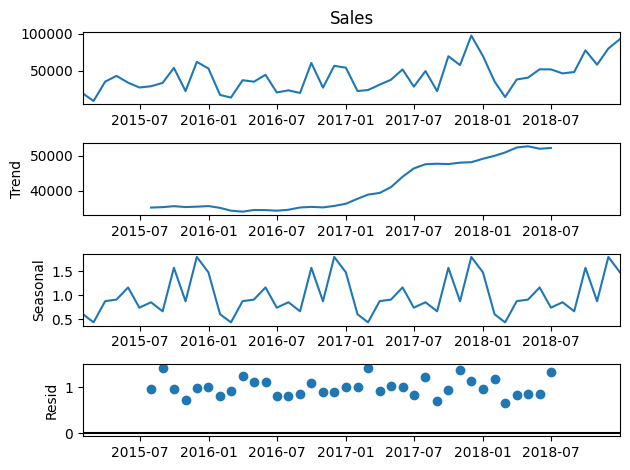

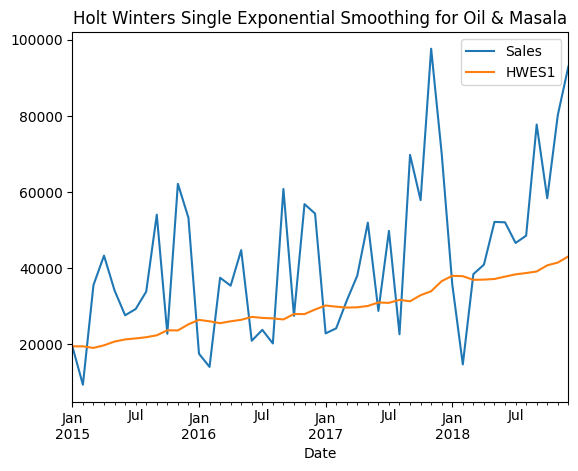

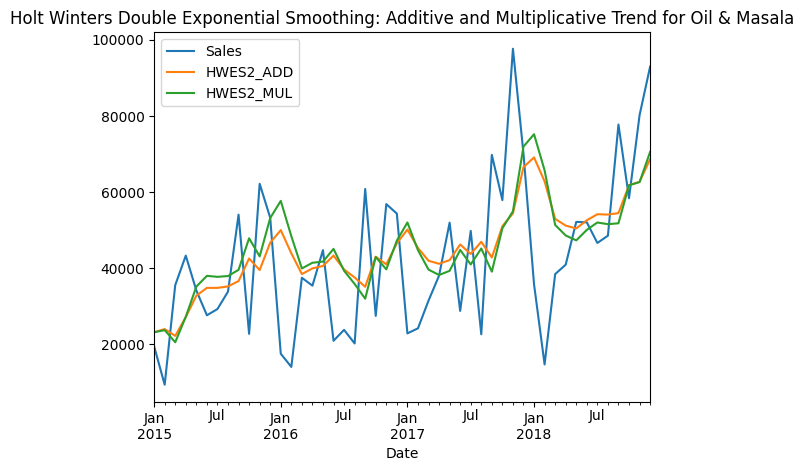

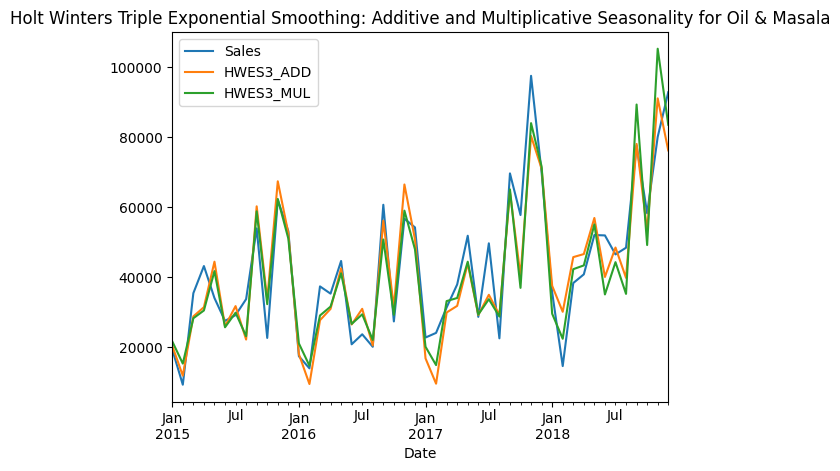

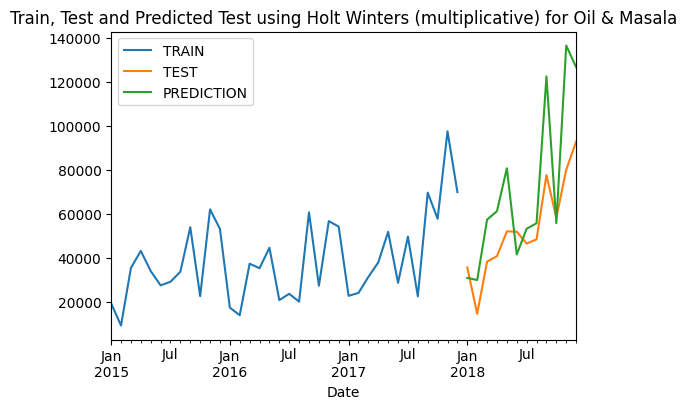

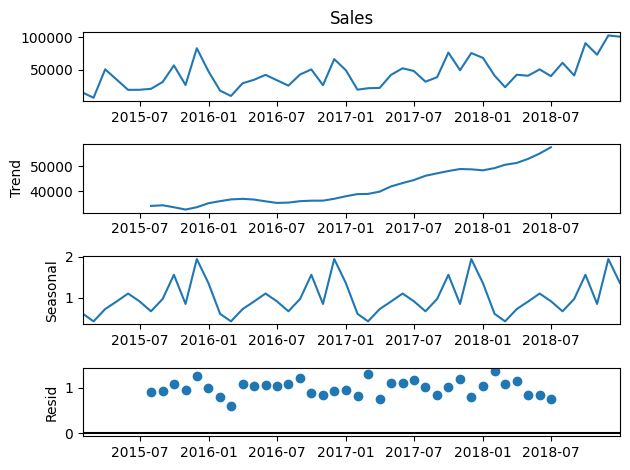

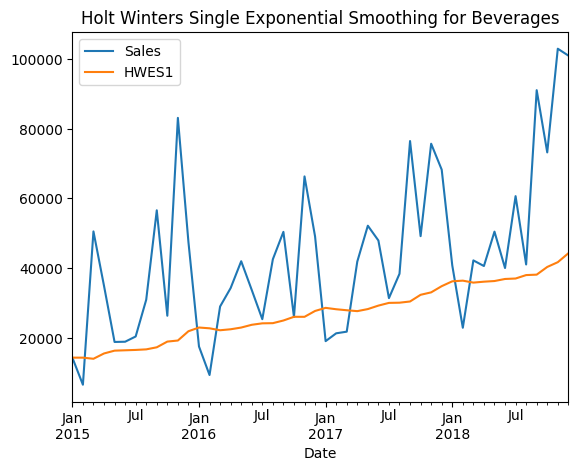

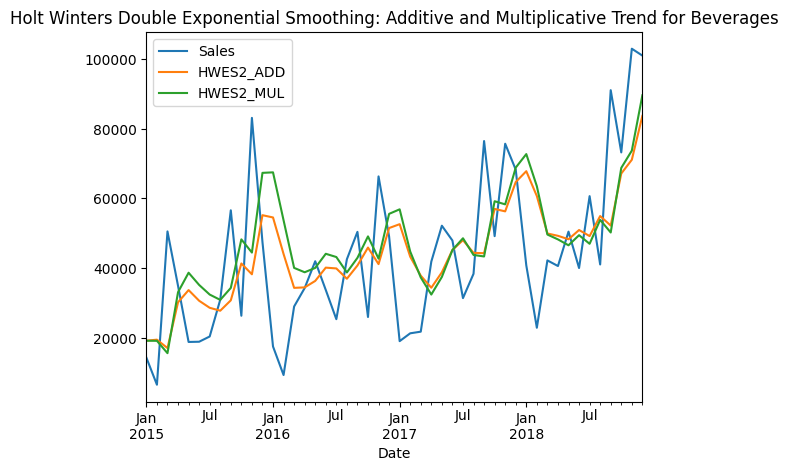

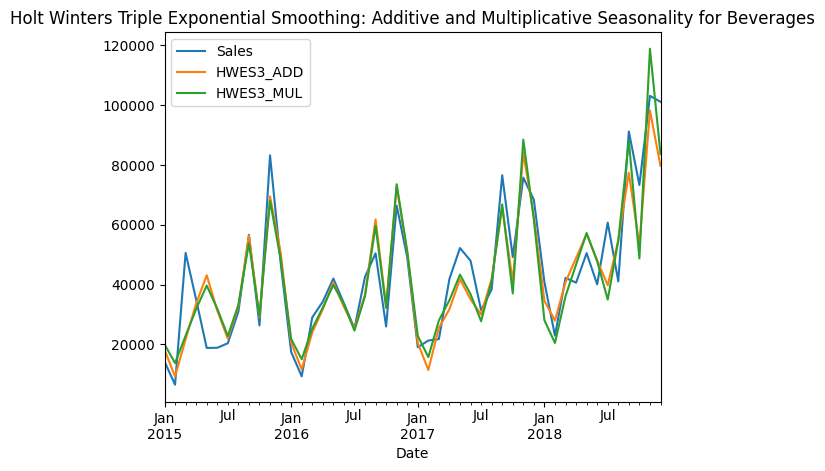

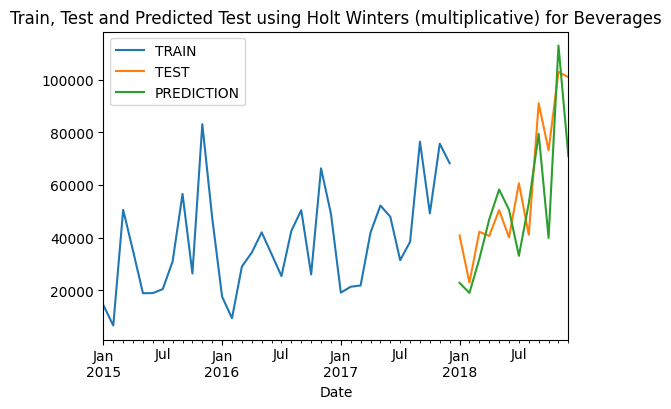

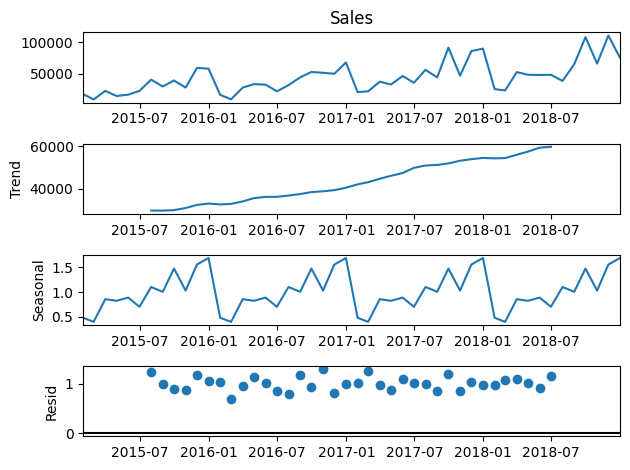

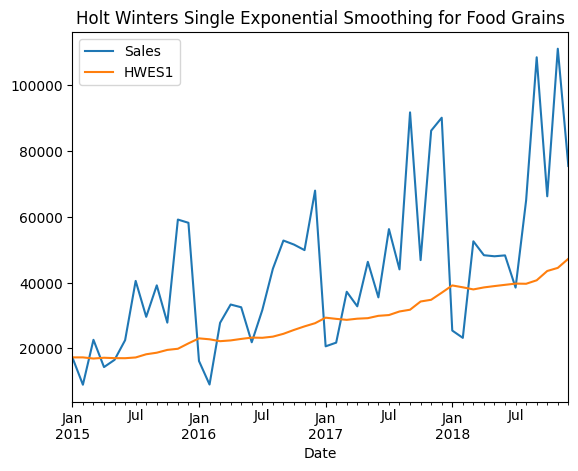

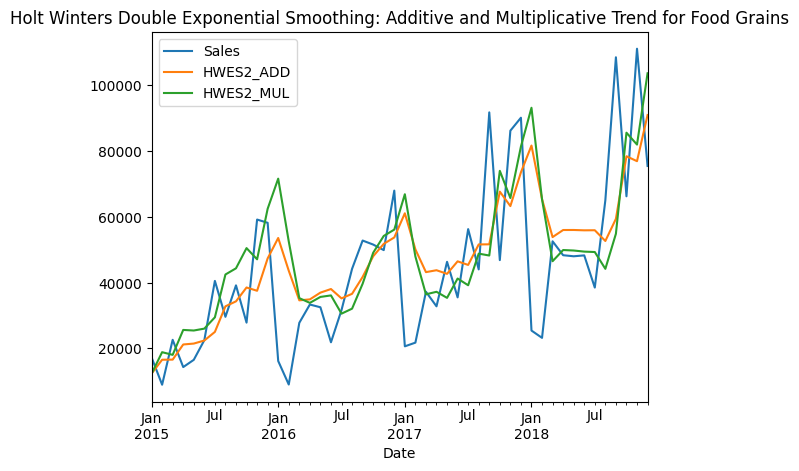

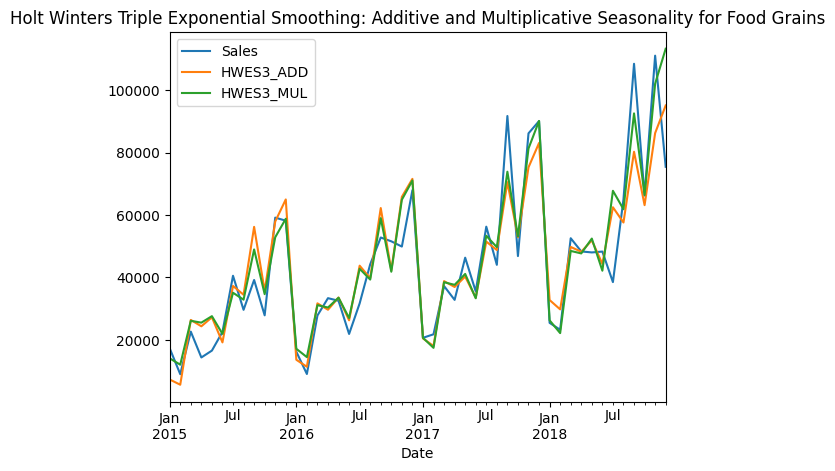

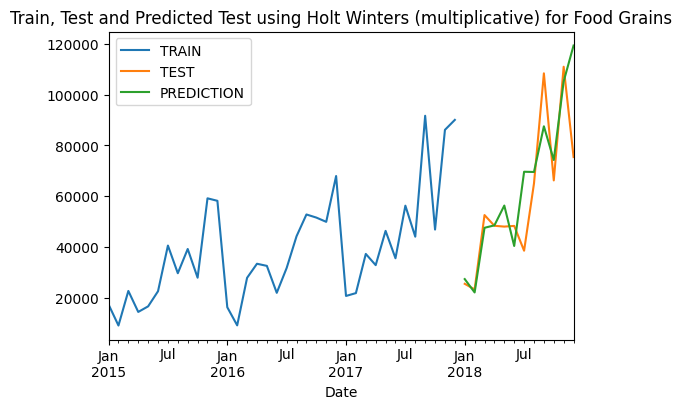

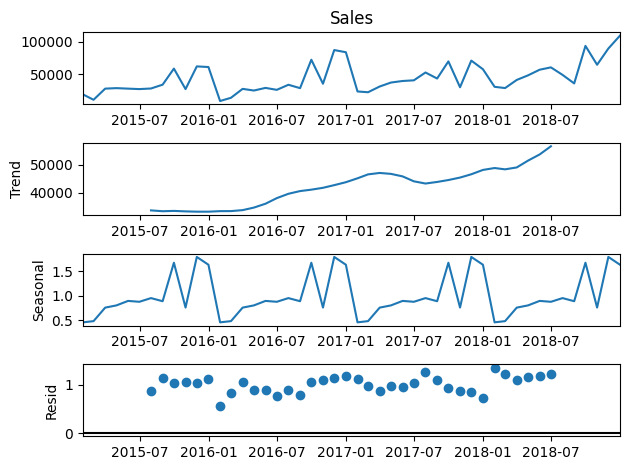

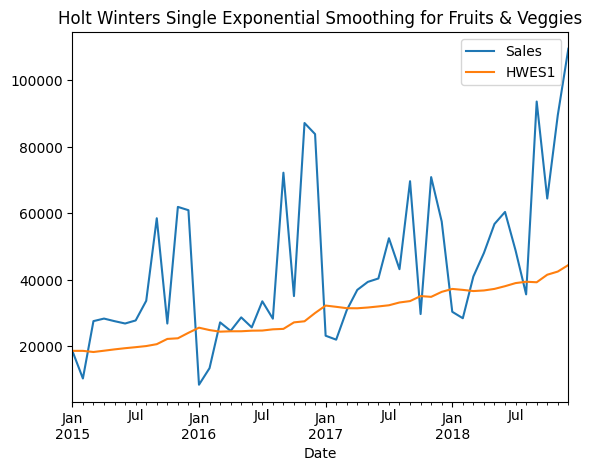

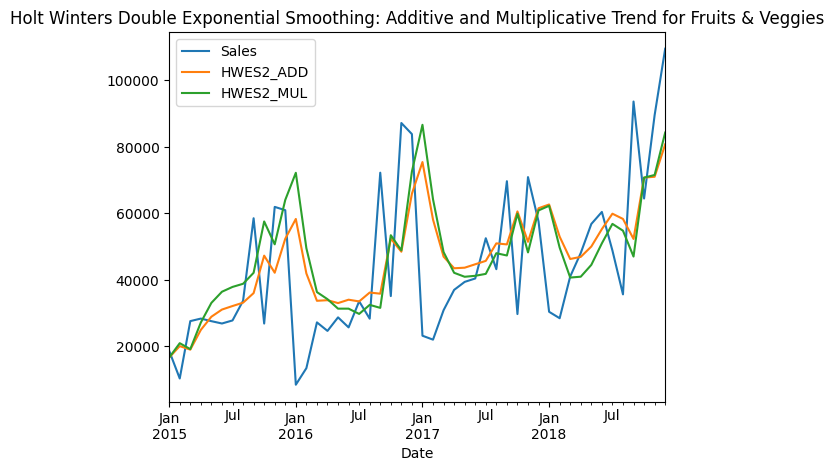

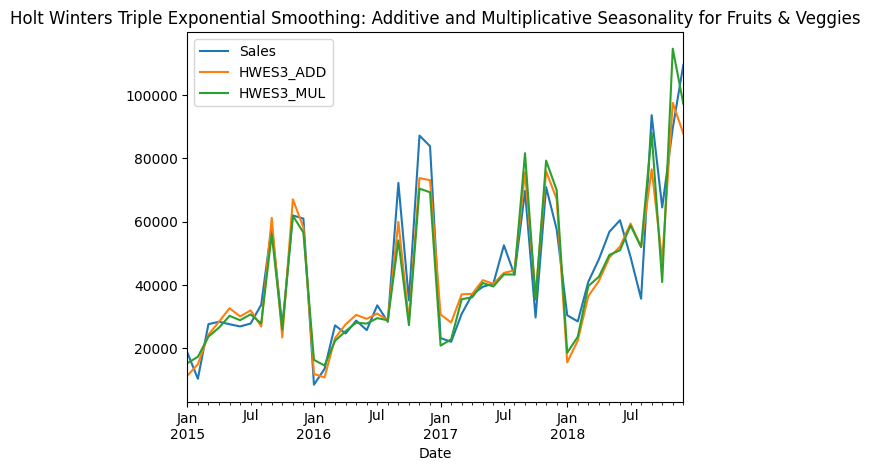

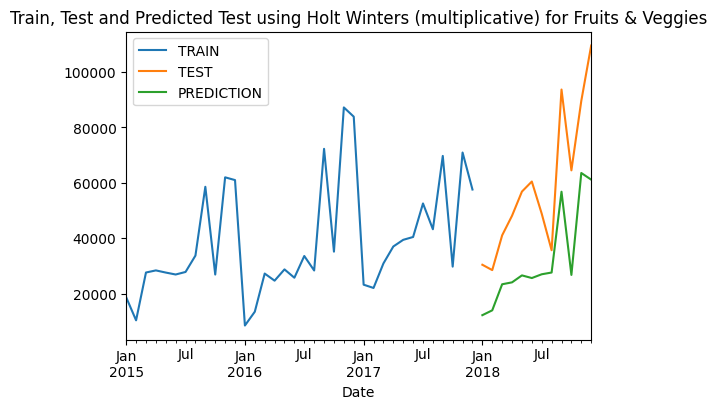

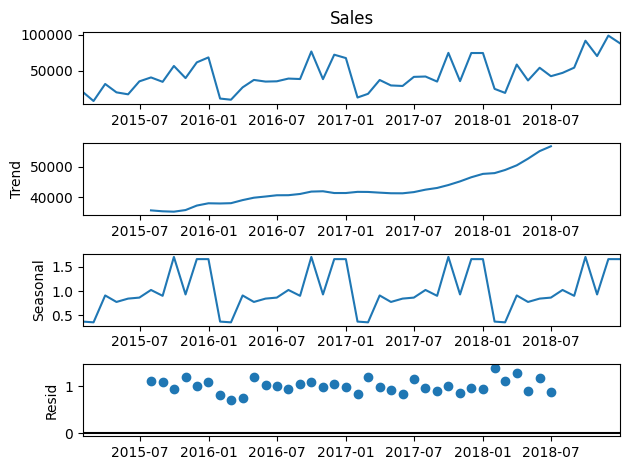

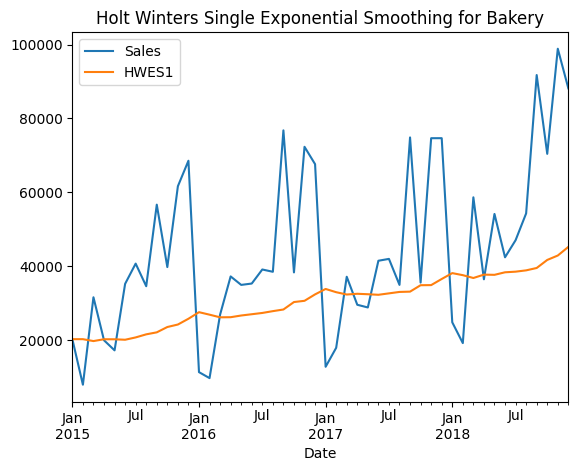

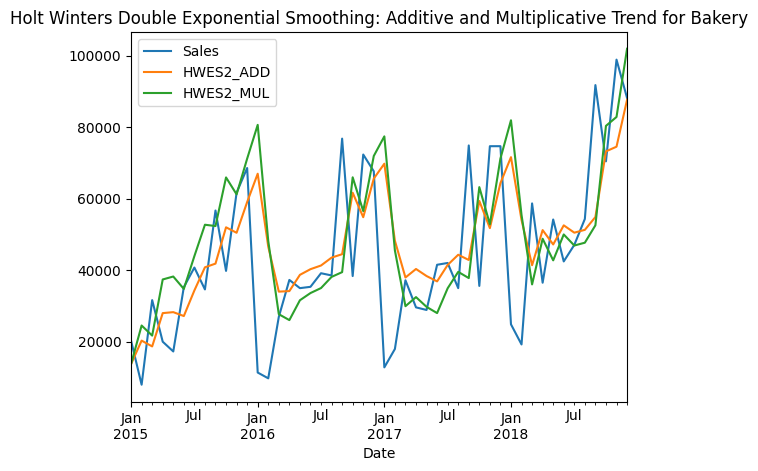

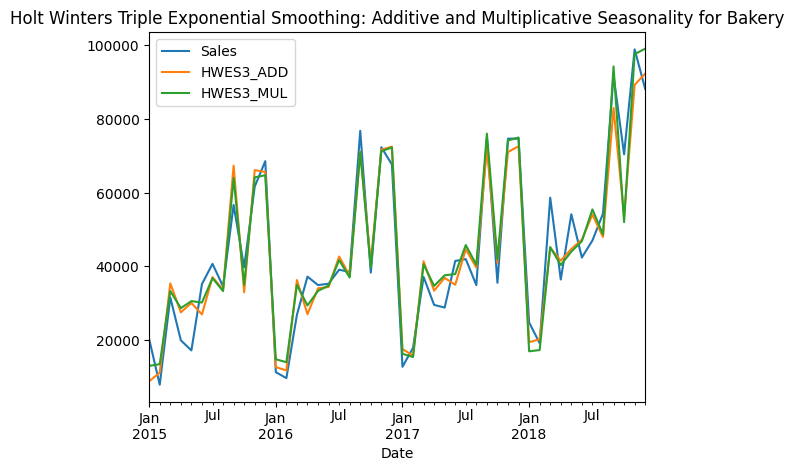

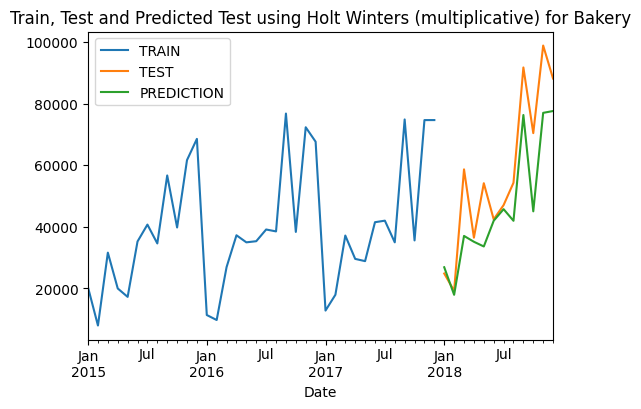

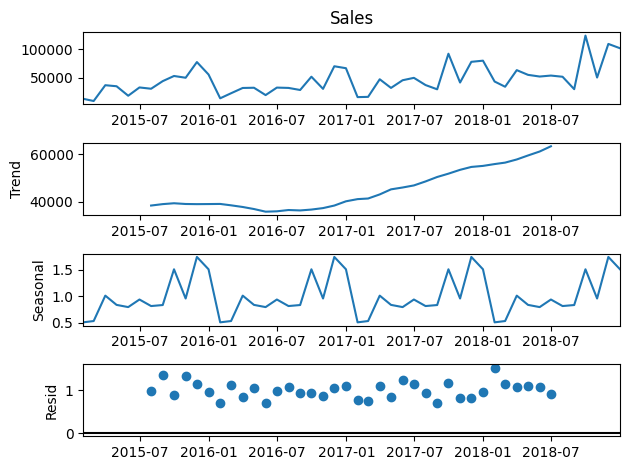

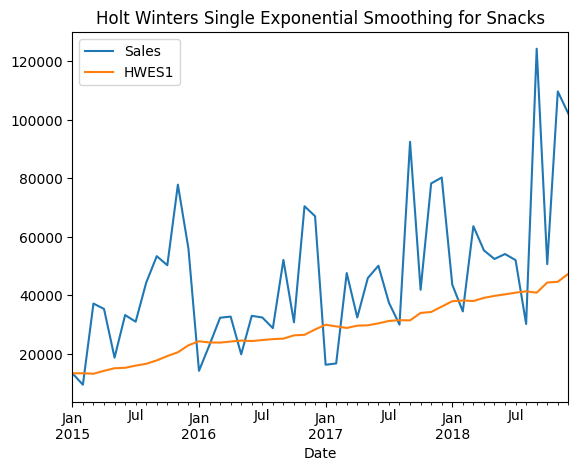

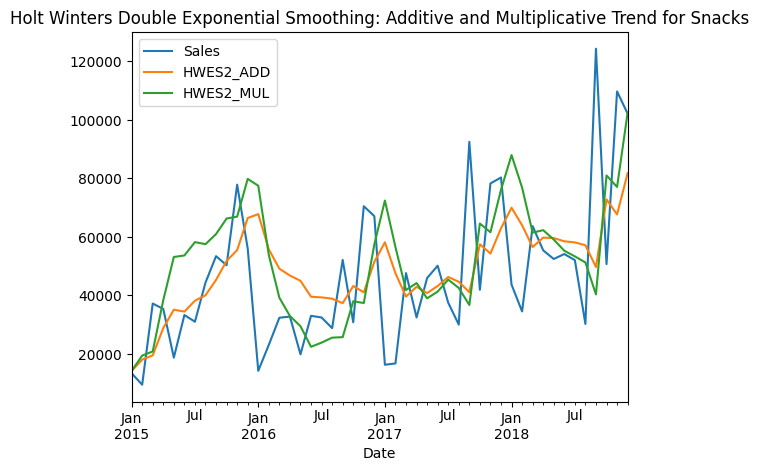

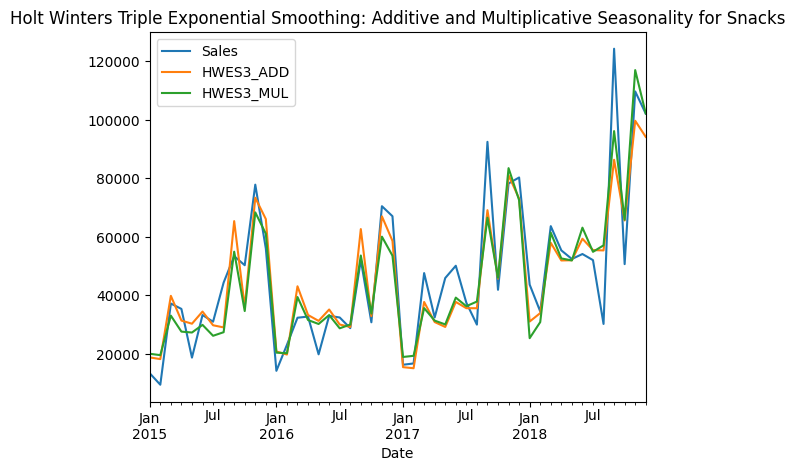

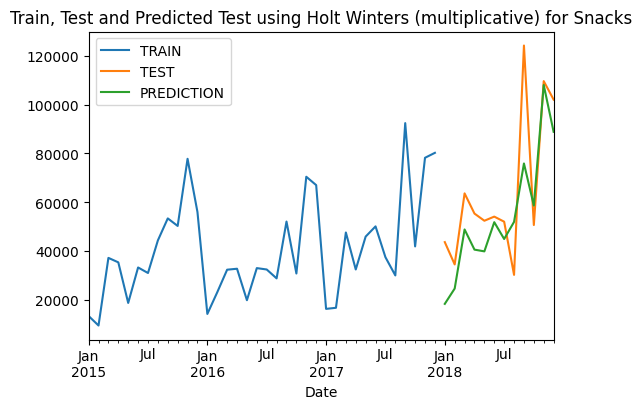

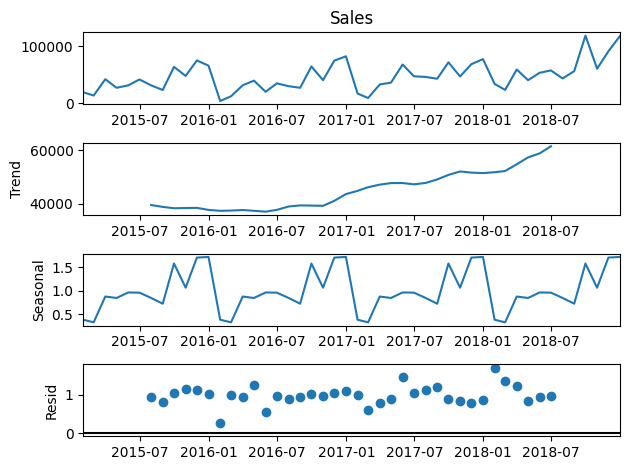

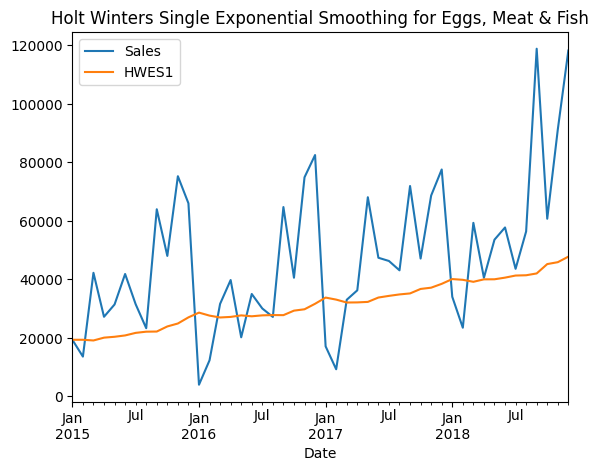

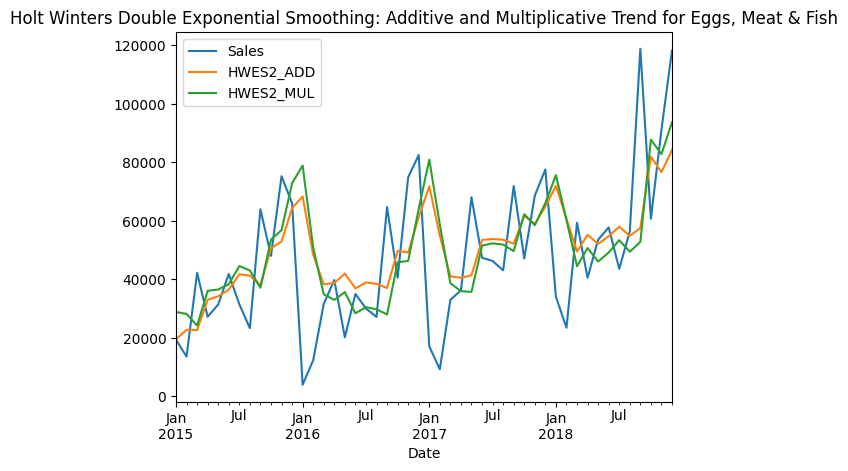

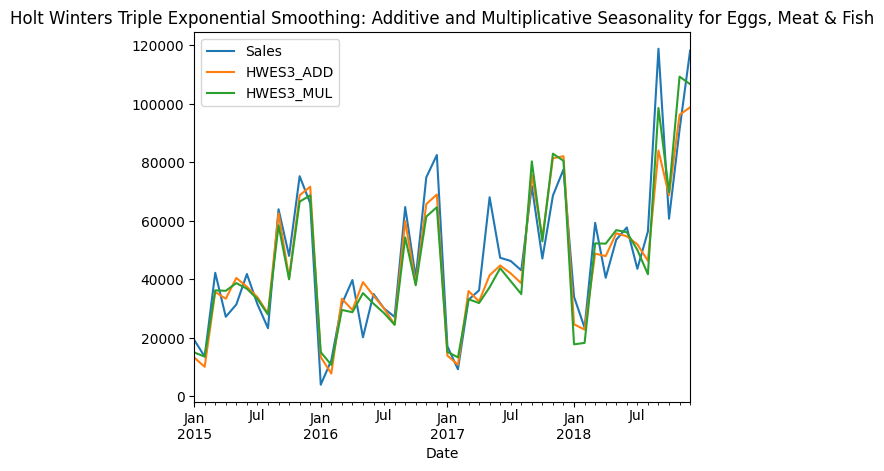

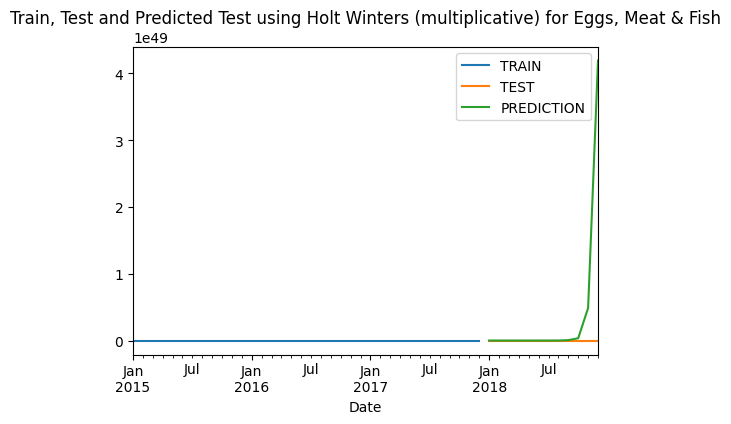

In [9]:
for i in cat:
  fun(i)

In [10]:
# tb = pd.DataFrame(table1, index=['Mean absolute error', 'Mean square error', 'r2 score', 'Mean absolute percentage error'])
# print(tb)
# print('_____________________________________________________________________')
# print('\n\n')
# s = '/content/res.xlsx'
# print(s)
# tb.to_excel(s)

In [11]:
# fun('Eggs, Meat & Fish')

In [12]:
# s1 = '/content/train.xlsx'
# s2 = '/content/test.xlsx'
# train_data.to_excel(s1)
# test_data.to_excel(s2)